# 🎯 Gradient Boosting for Classification

## 📝 Core Concept
**Sequential ensemble method** for classification using additive models in the **log-odds space** with probability transformations.

---

## 🔄 Binary Classification Algorithm

### **Step 1: Initialize**
$$F_0(x) = \log\left(\frac{\bar{p}}{1-\bar{p}}\right)$$
where $\bar{p} = \frac{1}{n}\sum_{i=1}^n y_i$ (class proportion)

### **Step 2: Iterative Boosting** (for $m = 1, 2, ..., M$)

**2a. Compute Probabilities**
$$p_i^{(m-1)} = \frac{1}{1 + e^{-F_{m-1}(x_i)}}$$

**2b. Compute Residuals (Negative Gradients)**
$$r_{im} = y_i - p_i^{(m-1)}$$

**2c. Fit Base Learner**
$$h_m(x) = \text{fit}(\{(x_i, r_{im})\}_{i=1}^n)$$

**2d. Update Model**
$$F_m(x) = F_{m-1}(x) + \nu \cdot h_m(x)$$

### **Step 3: Final Prediction**
$$P(y=1|x) = \frac{1}{1 + e^{-F(x)}} = \frac{1}{1 + e^{-\sum_{m=0}^M h_m(x)}}$$

---

## 🎲 Multi-Class Classification (K classes)

### **One-vs-All Approach**
For each class $k$:
$$F_k^{(0)}(x) = \log\left(\frac{\bar{p}_k}{1-\bar{p}_k}\right)$$

**Iterative Updates:**
$$r_{ikm} = y_{ik} - p_{ik}^{(m-1)}$$
$$F_k^{(m)}(x) = F_k^{(m-1)}(x) + \nu \cdot h_{km}(x)$$

**Softmax Probabilities:**
$$P(y=k|x) = \frac{e^{F_k(x)}}{\sum_{j=1}^K e^{F_j(x)}}$$

---

## 📊 Loss Functions for Classification

| **Loss Function** | **Formula** | **Gradient** |
|------------------|-------------|--------------|
| **Logistic Loss** | $L = \log(1 + e^{-yF})$ | $r = \frac{y}{1 + e^{yF}}$ |
| **Exponential Loss** | $L = e^{-yF}$ | $r = ye^{-yF}$ |
| **Cross-Entropy** | $L = -y\log(p) - (1-y)\log(1-p)$ | $r = y - p$ |

where $y \in \{-1, +1\}$ for binary classification

---

## 🔢 Key Mathematical Relationships

### **Log-Odds to Probability**
$$\text{logit}(p) = \log\left(\frac{p}{1-p}\right) = F(x)$$
$$p = \sigma(F(x)) = \frac{1}{1 + e^{-F(x)}}$$

### **Gradient for Logistic Loss**
$$\frac{\partial L}{\partial F} = \frac{\partial}{\partial F}[\log(1 + e^{-yF})] = \frac{-y}{1 + e^{yF}}$$

### **Newton-Raphson Approximation**
For better convergence, some implementations use:
$$\gamma_m = \frac{\sum_{i \in R_{jm}} r_{im}}{\sum_{i \in R_{jm}} |r_{im}|(1-|r_{im}|)}$$

---

## ⚙️ Implementation Details

### **Class Imbalance Handling**
```python
# Weighted initialization
F_0(x) = log(pos_weight * p_pos / p_neg)
```

### **Multi-Class Strategy**
- **One-vs-Rest**: K separate binary classifiers
- **Multinomial**: Single K-class model with softmax

---

## 🎯 Hyperparameters

- **`n_estimators`**: Number of boosting rounds $M$
- **`learning_rate`**: Shrinkage parameter $\nu$
- **`max_depth`**: Depth of decision trees
- **`min_samples_leaf`**: Minimum samples per leaf
- **`class_weight`**: Handle imbalanced datasets

---

## 🔍 Feature Importance
$$\text{Importance}_j = \sum_{m=1}^M \sum_{t=1}^{T_m} I_t^2 \mathbf{1}(v(t) = j)$$

where $I_t^2$ is the improvement at node $t$ and $v(t)$ is the feature used.

---

## ✨ Key Advantages
- **Probabilistic outputs** with calibrated confidence
- **Handles categorical features** naturally
- **Built-in feature selection** through splits
- **Robust to outliers** (tree-based)

## ⚠️ Considerations
- **Requires probability calibration** for reliable confidence
- **Can overfit** with too many estimators
- **Sensitive to class imbalance** without proper weighting

---

## 🧠 Simple Step-by-Step Intuition

### **🎯 What's Really Happening?**

1. **Start Simple** 📊  
   *"Begin with a basic guess (log-odds of class proportion)"*  
   Like predicting the most common class as your baseline.

2. **Find Mistakes** 🔍  
   *"Calculate how wrong your current model is for each sample"*  
   Residuals = True labels - Current predictions (in probability space).

3. **Learn from Mistakes** 🌳  
   *"Train a new tree to predict these mistakes"*  
   The tree learns patterns in where your model fails.

4. **Add the Fix** ➕  
   *"Combine the new tree with your existing model"*  
   Each tree contributes a small correction to improve overall accuracy.

5. **Convert to Probabilities** 🎲  
   *"Transform log-odds back to probabilities for final prediction"*  
   Sigmoid function converts raw scores to interpretable probabilities.

### **🔄 The Magic Loop**
```
Predictions → Errors → New Tree → Better Predictions → Repeat
```

**Key Insight**: Each tree specializes in fixing the mistakes of the previous ensemble, leading to progressively better classification!

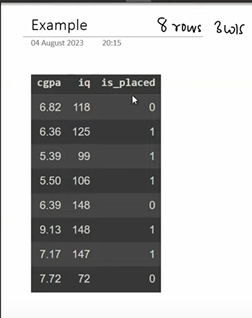

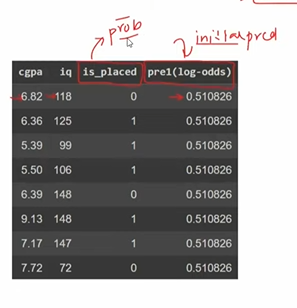

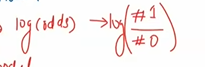

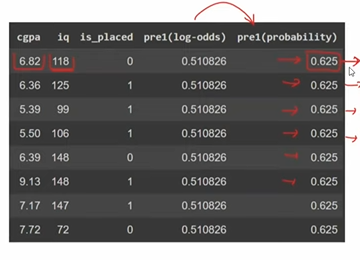

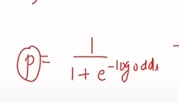

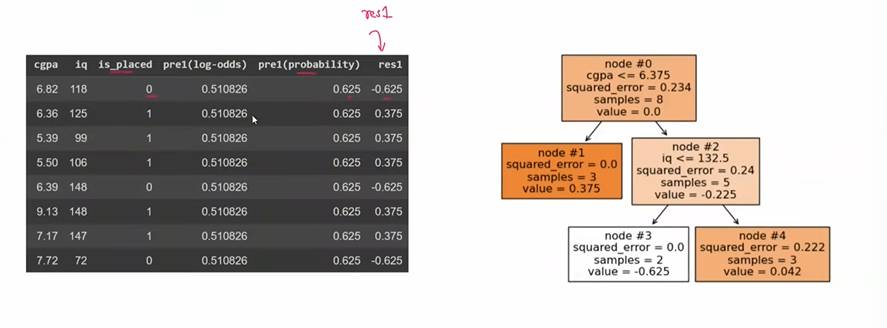

odds=p/(1-p)

log(odds) is used to express the probabilities in the logarithmic scale

residuals = y_i - p_i

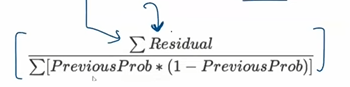